In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("/kaggle/input/voicegender/voice.csv")

In [3]:
print("Ukuran dataset:", df.shape)

Ukuran dataset: (3168, 21)


In [4]:
print("Jumlah fitur (tanpa target):", df.shape[1]-1)

Jumlah fitur (tanpa target): 20


In [5]:
print("\nJumlah missing values per kolom:\n", df.isnull().sum())


Jumlah missing values per kolom:
 meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


In [6]:
print("\nStatistik dasar:\n", df.describe().T)


Statistik dasar:
            count       mean         std       min       25%       50%  \
meanfreq  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
sd        3168.0   0.057126    0.016652  0.018363  0.041954  0.059155   
median    3168.0   0.185621    0.036360  0.010975  0.169593  0.190032   
Q25       3168.0   0.140456    0.048680  0.000229  0.111087  0.140286   
Q75       3168.0   0.224765    0.023639  0.042946  0.208747  0.225684   
IQR       3168.0   0.084309    0.042783  0.014558  0.042560  0.094280   
skew      3168.0   3.140168    4.240529  0.141735  1.649569  2.197101   
kurt      3168.0  36.568461  134.928661  2.068455  5.669547  8.318463   
sp.ent    3168.0   0.895127    0.044980  0.738651  0.861811  0.901767   
sfm       3168.0   0.408216    0.177521  0.036876  0.258041  0.396335   
mode      3168.0   0.165282    0.077203  0.000000  0.118016  0.186599   
centroid  3168.0   0.180907    0.029918  0.039363  0.163662  0.184838   
meanfun   3168.0   0.142807    0

In [7]:
print("\nDistribusi label:\n", df['label'].value_counts())


Distribusi label:
 label
male      1584
female    1584
Name: count, dtype: int64


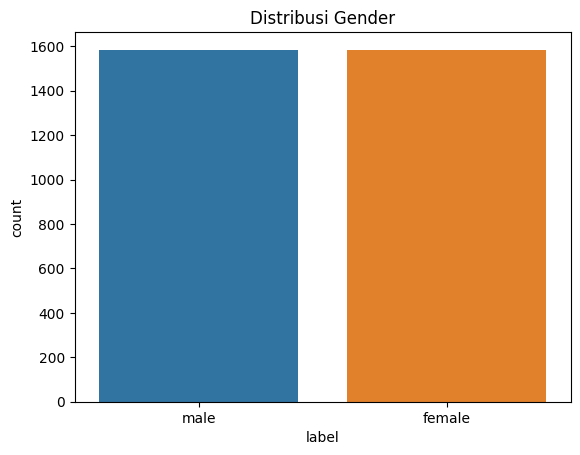

In [8]:
sns.countplot(x='label', data=df)
plt.title("Distribusi Gender")
plt.show()

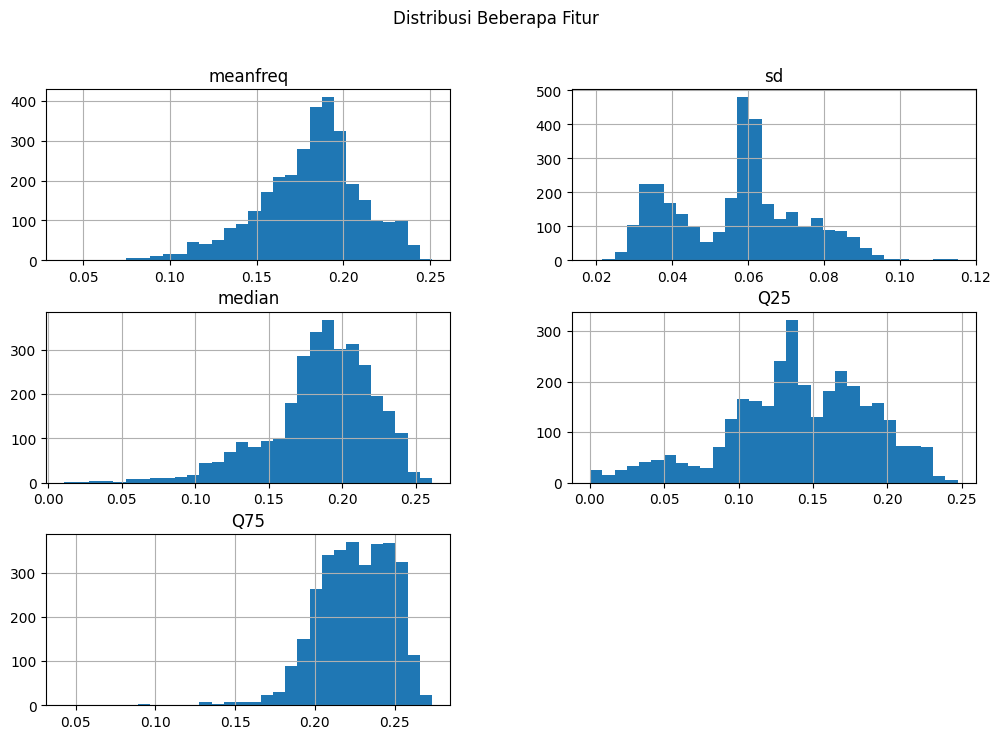

In [9]:
df[['meanfreq','sd','median','Q25','Q75']].hist(bins=30, figsize=(12,8))
plt.suptitle("Distribusi Beberapa Fitur")
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


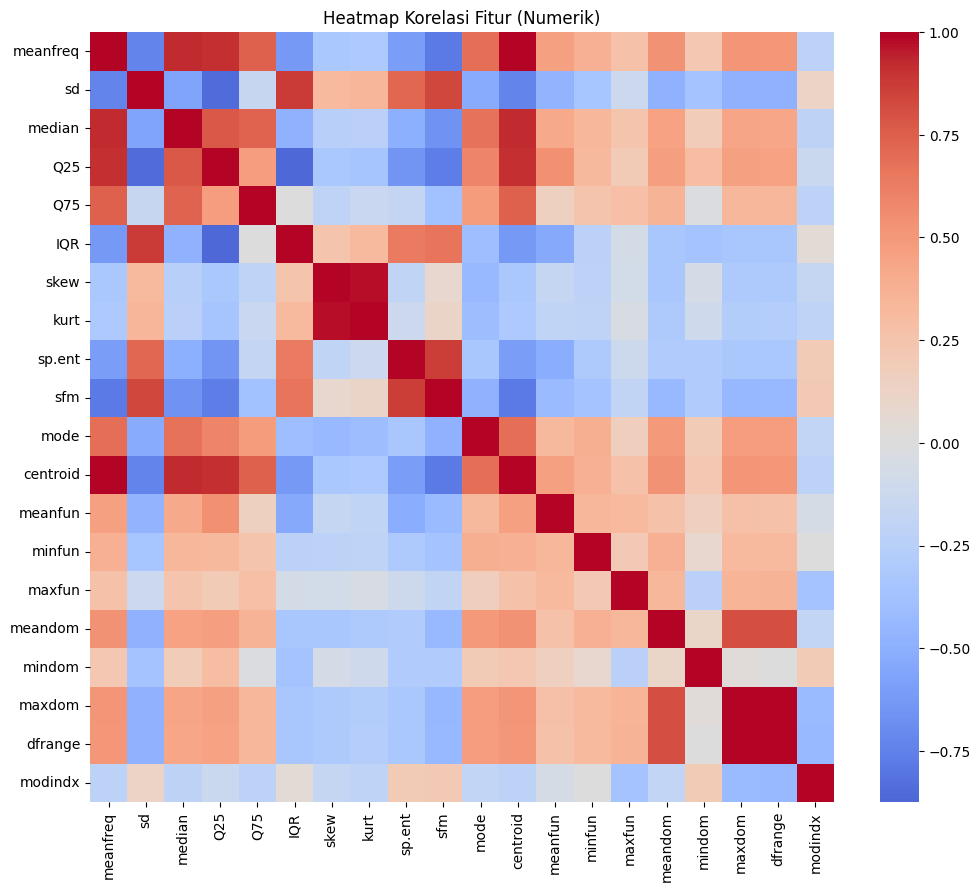

In [10]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Fitur (Numerik)")
plt.show()

In [11]:
df['label'] = df['label'].map({'male':0, 'female':1})

In [12]:
X = df.drop('label', axis=1)
y = df['label']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
print("Ukuran data train:", X_train.shape)
print("Ukuran data test :", X_test.shape)

Ukuran data train: (2534, 20)
Ukuran data test : (634, 20)


In [16]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [17]:
y_pred = xgb_model.predict(X_test)

In [18]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9779179810725552


In [19]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Male','Female']))


Classification Report:
               precision    recall  f1-score   support

        Male       0.99      0.97      0.98       317
      Female       0.97      0.99      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



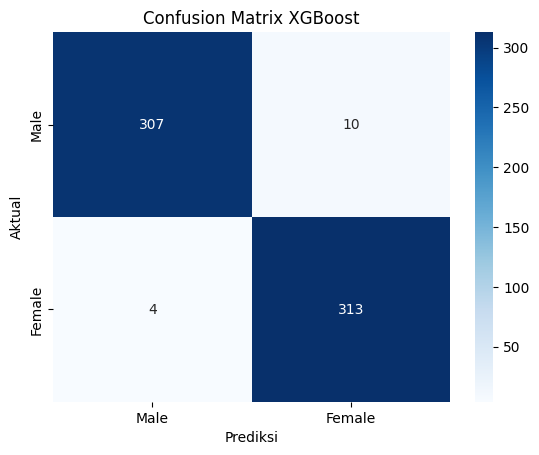

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Male','Female'],
            yticklabels=['Male','Female'])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix XGBoost")
plt.show()

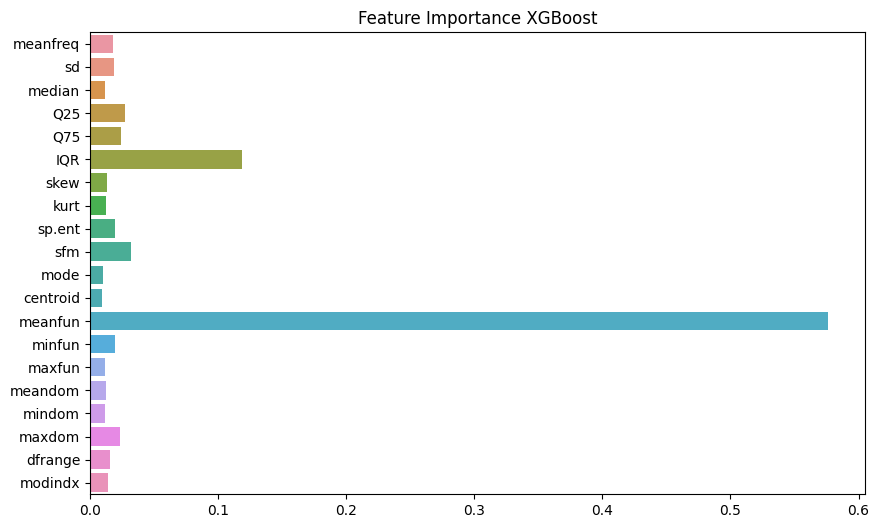

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title("Feature Importance XGBoost")
plt.show()